In [41]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random as rn
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

# Dataset 생성

### Data 불러오기

In [13]:
DATA_PATH = '/Users/sea/YBIGTAlab/project0/dataset/' 

# classes of images
categories = os.listdir(DATA_PATH)
categories.remove('.DS_Store')

num_classes = len(categories)

In [58]:
X = []  # list of images
Y = []  # list of labels

for index, category in enumerate(categories):

    label = [0 for i in range(num_classes)]
    label[index]=1
    image_dir = DATA_PATH + category + '/'

    for top, dir, f in os.walk(image_dir):
        print("Number of",category,len(f))
        for filename in f:
            url = image_dir + filename
            img = cv2.imread(url)
            X.append(img)
            Y.append(label)

Number of 0 1246
Number of 1 612


In [59]:
X = np.array(X)
Y = np.array(Y)

In [60]:
X.shape, Y.shape

((1858, 90, 120, 3), (1858, 2))

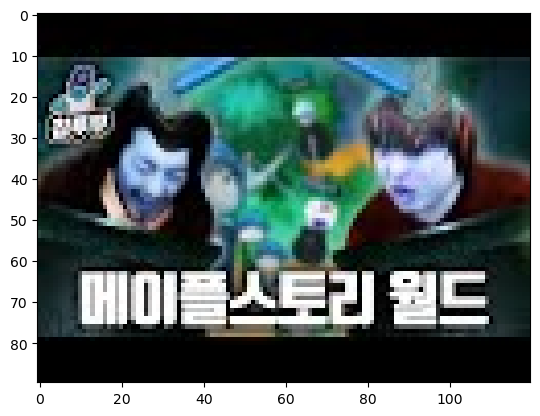

In [61]:
plt.imshow(X[0])

### Train-Test Data split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)

In [63]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1486, 90, 120, 3), (372, 90, 120, 3), (1486, 2), (372, 2))

### Validation Data

In [64]:
test_images = np.array(X_test)
test_labels = np.array(Y_test)

In [65]:
tr_images, val_images, tr_labels, val_labels = train_test_split(X_train, Y_train, stratify=Y_train, test_size = 0.25, random_state=0)

In [66]:
tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape

((1114, 90, 120, 3), (1114, 2), (372, 90, 120, 3), (372, 2))

In [67]:
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0) # Generator (Preprocessing & Data augmentation)

In [68]:
BATCH_SIZE = 16

In [69]:
flow_tr_gen = train_generator.flow(tr_images, tr_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_labels, batch_size=BATCH_SIZE, shuffle=False)

# Model Learning - VGG16

In [70]:
IMG_LENGTH = 90
IMG_WIDTH = 120

In [71]:
base_model = VGG16(input_shape = (IMG_LENGTH, IMG_WIDTH, 3), weights='imagenet', include_top=False)
bm_output = base_model.output

x = GlobalAveragePooling2D()(bm_output)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', name='fc1')(x)
x = Dropout(rate=0.5)(x)
output = Dense(num_classes, activation='softmax', name='output')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 120, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 90, 120, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 90, 120, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 45, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 45, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 45, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 22, 30, 128)       0   

In [72]:
len(model.layers)

24

In [73]:
FINE_TUNE_AT = 16

In [74]:
for layer in model.layers[:FINE_TUNE_AT]:
    layer.trainable = False

In [75]:
display_layers = [(layer, layer.name, layer.trainable) for layr in model.layers]

pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
1,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
3,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
4,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
6,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
7,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False
9,<keras.layers.convolutional.conv2d.Conv2D obje...,block5_conv1,False


In [76]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
 
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [77]:
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]

history = model.fit(flow_tr_gen, epochs=20, 
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)), 
                    validation_data=flow_val_gen,
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/20
36/70 [==============>...............] - ETA: 1:14 - loss: 0.7100 - accuracy: 0.6424

KeyboardInterrupt: 

In [ ]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_labels, batch_size = BATCH_SIZE)
model.evaluate(flow_test_gen)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)